In [ ]:
!pip install pygame==2.0.0.dev4
!python --version
!pip install -U ray 
!pip install ray[rllib]
!pip install ray[tune]
import os
os.environ['SDL_VIDEODRIVER']='dummy'

Python 3.6.9
Requirement already up-to-date: ray in /usr/local/lib/python3.6/dist-packages (0.8.4)


In [ ]:


# environment for all agents in the multiagent world
# currently code assumes that no agents will be created/destroyed at runtime!
class MultiCarEnv(gym.Env, MultiAgentEnv):
    metadata = {
        'render.modes' : ['human', 'console']
    }

    UP = 0
    DOWN = 1




    def __init__(self):
        super(MultiCarEnv, self).__init__()

        pygame.init()
        self.screen = pygame.display.set_mode((1024, 800))
        self.screen.fill([128, 128, 128])
        pygame.display.update()


        def drawCirclePad(xc, yc, x, y, pads):
            pads.append(PadSprite((xc + x, yc + y),'pad_sq.png'))
            #pads.append(PadSprite((xc - x, yc + y),'pad_sq.png'))
            pads.append(PadSprite((xc + x, yc - y),'pad_sq.png'))
            pads.append(PadSprite((xc - x, yc - y),'pad_sq.png'))
            pads.append(PadSprite((xc + y, yc + x),'pad_sq.png'))
            #pads.append(PadSprite((xc - y, yc + x),'pad_sq.png'))
            pads.append(PadSprite((xc + y, yc - x),'pad_sq.png'))
            pads.append(PadSprite((xc - y, yc - x),'pad_sq.png'))

        def drawCirclePad2(xc, yc, x, y, pads):
            pads.append(PadSprite((xc + x, yc + y),'pad_sq.png'))
            pads.append(PadSprite((xc - x, yc + y),'pad_sq.png'))
            #pads.append(PadSprite((xc + x, yc - y),'pad_sq.png'))
            pads.append(PadSprite((xc - x, yc - y),'pad_sq.png'))
            pads.append(PadSprite((xc + y, yc + x),'pad_sq.png'))
            pads.append(PadSprite((xc - y, yc + x),'pad_sq.png'))
            #pads.append(PadSprite((xc + y, yc - x),'pad_sq.png'))
            pads.append(PadSprite((xc - y, yc - x),'pad_sq.png'))

        def drawCirclePad3(xc, yc, x, y, pads):
            pads.append(PadSprite((xc + x, yc + y),'pad_sq.png'))
            pads.append(PadSprite((xc - x, yc + y),'pad_sq.png'))
            pads.append(PadSprite((xc + x, yc - y),'pad_sq.png'))
            pads.append(PadSprite((xc - x, yc - y),'pad_sq.png'))
            pads.append(PadSprite((xc + y, yc + x),'pad_sq.png'))
            pads.append(PadSprite((xc - y, yc + x),'pad_sq.png'))
            pads.append(PadSprite((xc + y, yc - x),'pad_sq.png'))
            pads.append(PadSprite((xc - y, yc - x),'pad_sq.png'))


        def circleBres(xc, yc, r, pad, flag):

            x = 0
            y = r; 
            d = 3 - 2 * r 
            if flag == 1:
                drawCirclePad(xc, yc, x, y, pad)
            elif flag == 2:
                drawCirclePad2(xc, yc, x, y, pad)
            else:
                drawCirclePad3(xc, yc, x, y, pad)

            while y >= x:
                  
                x += 1

                if d > 0:
                    y -= 1
                    d = d + 4 * (x - y) + 10; 
                
                else:
                    d = d + 4 * x + 6; 
                if flag == 1:
                    drawCirclePad(xc, yc, x, y, pad)
                elif flag == 2:
                    drawCirclePad2(xc, yc, x, y, pad)
                else:
                    drawCirclePad3(xc, yc, x, y, pad)




        pads1 = []
        pads2 = []  

        circleBres(700, 220, 200, pads1, 1)
        circleBres(370, 550, 200, pads1, 2)
        circleBres(700, 220, 130, pads2, 1)
        circleBres(370, 550, 130, pads2, 2)


        #left horiz
        for i in range(370, 490):
            pads1.append(PadSprite((i, 350), 'pad_sq.png'))

        for i in range(370, 490):
            pads1.append(PadSprite((i, 420), 'pad_sq.png'))
        #right horiz
        for i in range(580, 700):
            pads1.append(PadSprite((i, 350), 'pad_sq.png'))

        for i in range(580, 700):
            pads1.append(PadSprite((i, 420), 'pad_sq.png'))
        #top vert
        for i in range(220, 350):
            pads1.append(PadSprite((500, i), 'pad_sq.png'))
        #bot vert
        for i in range(420, 550):
            pads1.append(PadSprite((570, i), 'pad_sq.png'))

        for i in range(420, 550):
            pads1.append(PadSprite((500, i), 'pad_sq.png'))

        for i in range(220, 350):
            pads1.append(PadSprite((570, i), 'pad_sq.png'))


        self.pad_group1 = pygame.sprite.RenderPlain(*pads1)
        self.pad_group2 = pygame.sprite.RenderPlain(*pads2)



        self.checkpoints = [CheckPointSprite(500, 200, 75, 30, 1), 
                      CheckPointSprite(650, 350, 30, 75, 2),
                      CheckPointSprite(340, 350, 30, 75, 3),
                      CheckPointSprite(500, 490, 75, 30, 4),
                      CheckPointSprite(500, 350, 100, 100, 5)
                      ]
        self.check_group = pygame.sprite.RenderPlain(*self.checkpoints)


        car10 = CarSprite('car.png', (530, 200))
        car2 = CarSprite('car.png', (590, 100))
        car3 = CarSprite('car.png', (700, 50))
        car4 = CarSprite('car.png', (810, 100))
        car5 = CarSprite('car.png', (865, 200))
        car6 = CarSprite('car.png', (830, 320))
        car7 = CarSprite('car.png', (700, 385))
        car7.cur_policy = 2
        car7.direction = 90
        car8 = CarSprite('car.png', (550, 385))
        car8.cur_policy = 2
        car8.direction = 90
        car9 = CarSprite('car.png', (400, 385))
        car9.cur_policy = 2
        car9.direction = 90
        car = CarSprite('car.png', (250, 450))
        car.cur_policy = 3
        #car = CarSprite('car.png', (200, 560))
        #car.cur_policy = 3
        self.cars = [car, car2, car3, car4, car5, car6, car7, car8, car9, car10]
        self.car_group = pygame.sprite.RenderPlain(*self.cars)


        def addSensor(car, sensors):
            sensors.append(SensorSprite(0, -250, car))
            sensors.append(SensorSprite(200, -230, car))
            sensors.append(SensorSprite(-200, -230, car))
            sensors.append(SensorSprite(250, 0, car))
            sensors.append(SensorSprite(-250, 0, car))
            sensors.append(SensorSprite(0, 250, car))
            sensors.append(SensorSprite(200, 230, car))
            sensors.append(SensorSprite(-200, 230, car))
            

        self.sensors = []
        


        for c in self.cars:
            curr = []
            addSensor(c, curr)
            self.sensors.append(curr)

        self.sensor_group = []
        for sensor in self.sensors:
            self.sensor_group.append(pygame.sprite.RenderPlain(*sensor))
    
        self.time = 0

        #accelerate, decelerate, nothing
        self.action_space = spaces.Discrete(3)
        #distance to another object, average velocity of other cars, own velocity
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf,
                                        shape=(10,), dtype=np.float32)

        self.wait = 3
        self.step_count = 0

        self.q = []
        self.delay = 0

        

    def step(self, action_n):
        self.step_count += 1
        self.delay += 1

        obs_d = {}
        reward_d = {}
        done_d =  {
            "car_0": False,      
            "__all__": False,  # the env is not done
        }

        info_d = {
            "car_0":{},
        }




        obs_n = []
        reward_n = []


        clock = pygame.time.Clock()
        #deltat = clock.tick(30)
        deltat = 30
        self.time += deltat
        # set and perform action for each agent
        i = 0
        idx = [0]
        for key, val in action_n.items():
            cur_action = val
            if cur_action == self.DOWN:
                self.cars[idx[i]].k_down = -1
            else:
                self.cars[idx[i]].k_down = 0
            if cur_action == self.UP:
                self.cars[idx[i]].k_up = 0.5
            else: 
                self.cars[idx[i]].k_up = 0
            i += 1

        if len(self.q) > 0 and (self.delay >= 35):
            temp = self.q.pop(0)
            temp.ready = True
            self.delay = 0

        i = 0
        for car in self.cars:

            other_cars = self.cars[:]
            other_cars.remove(car)
            other_cars_g = pygame.sprite.Group(other_cars)

            collisions_pad1 = pygame.sprite.spritecollide(car, self.pad_group1, False, collided = None)
            collisions_pad2 = pygame.sprite.spritecollide(car, self.pad_group2, False, collided = None)

            checks = pygame.sprite.spritecollide(car, self.check_group, False, collided = None)
            if len(checks) != 0 and checks[0].val != 5:
                car.cur_policy = checks[0].val


            #find the cars in range
            car_near = pygame.sprite.groupcollide(self.sensor_group[i].sprites()[0:3], other_cars_g, False, False, collided = None)
            #print(car_near)
            rect_list = []
            car_list = []
            #find the nearest car
            for key, value in car_near.items():
                for val in value:
                    car_list.append(val)
                    newrect = val.rect.clip(key.rect)
                    rect_list.append(newrect)
            #find nearest distance to other car
            mindist = 1000
            minCar = None
            k = 0
            for rec in rect_list:
                dist = math.sqrt((rec.centerx - car.rect.centerx) ** 2 + (rec.centery - car.rect.centery) ** 2)
                if dist < mindist:
                    mindist = dist
                    minCar = car_list[k]
                k += 1
            accel = 0


            #find car in front 
            car_front = pygame.sprite.spritecollide(self.sensor_group[i].sprites()[0], other_cars_g, False, collided = None)
            minFrontDist = 1000 
            minFrontCar = None
            front_rec_list = []
            for f in car_front:
                newrect = f.rect.clip(self.sensor_group[i].sprites()[0].rect)
                front_rec_list.append(newrect)
            k = 0
            for rec in front_rec_list:
                dist = math.sqrt((rec.centerx - car.rect.centerx) ** 2 + (rec.centery - car.rect.centery) ** 2)
                if dist < minFrontDist:
                    minFrontDist = dist
                    minFrontCar = car_front[k]
                k += 1





            if i != 0:
              if car.ready == True and (minFrontCar == None or car.speed < minFrontCar.speed):
                  if minFrontCar != None and 0.2 > minFrontCar.speed - car.speed:
                      accel = minFrontCar.speed - car.speed
                  else:
                      accel = 0.2
                  if len(checks) == 0:
                      car.ready = False
              elif mindist < 75:
                  if len(checks) > 0 and checks[0].val == 5 and car not in self.q: 
                      # queue to go
                      self.q.append(car)
                  accel = -(car.speed/2)
              else:
                  if minCar == None  or car.speed < minCar.speed:
                      #print("here" + " " + str(i) + str(minCar))
                      if minCar != None and 0.2 > minCar.speed - car.speed:
                          accel = minCar.speed - car.speed
                      else:
                          accel = 0.2
              car.speed += accel
            else:
               if car.ready == True and (minFrontCar == None or car.speed < minFrontCar.speed):
                  if len(checks) == 0:
                      car.ready = False
               elif mindist < 75:
                 if len(checks) > 0 and checks[0].val == 5 and car not in self.q:
                    self.q.append(car)
              
                 accel = -(car.speed/2)
                 car.k_down = 0
                 car.k_up = 0
                 car.speed += accel       


            x = car.rect.centerx
            y = car.rect.centery

            if car.cur_policy == 1:
                theta = (700 - x)/(math.sqrt((x - 700)**2 + (y-220)**2))
                if y > 220:
                    car.direction = (math.degrees(math.acos(theta)) % 360)
                else: 
                    car.direction = -math.degrees(math.acos(theta) % 360)
                if len(collisions_pad1) != 0:
                    car.direction -= 10
                elif len(collisions_pad2) != 0: 
                    car.direction += 10
            elif car.cur_policy == 3:
                theta = (370 - x)/(math.sqrt((x - 370)**2 + (y-550)**2))
                if y > 550:
                    car.direction = (math.degrees(math.acos(theta)) % 360) + 180 
                else: 
                    car.direction = -math.degrees(math.acos(theta) % 360) + 180
                if len(collisions_pad1) != 0:
                    car.direction += 10
                elif len(collisions_pad2) != 0: 
                    car.direction -= 10
            elif car.cur_policy == 2:
                car.direction = 90
            elif car.cur_policy == 4:
                car.direction = 0


            i += 1
        
        self.car_group.update(deltat)
        for s in self.sensor_group:
          s.update()

        if self.step_count == 1000:
          done_d['__all__'] = True
        

        avg_speed = 0
        for c in self.cars:
            avg_speed += c.speed
        avg_speed /= len(self.cars)
        #print(str(avg_speed) + " " + str(self.cars[0].cur_policy) + " " + str(self.cars[0].position))

        # record observation for each agent
        j = 0
        for car in self.cars:
            if j != 0: 
              continue
            current_obs = np.zeros(10)
            current_reward = 0
            closest_obj = 1000

            other_cars = self.cars[:]
            other_cars.remove(car)
            other_car_group = pygame.sprite.Group(other_cars)
            #print(other_cars)

            for i in range(0, len(self.sensors[j])):
                cur_sensor = self.sensors[j][i]
                
                #pad_near = pygame.sprite.spritecollide(cur_sensor, self.pad_group1, False, collided = None)
                #pad_near2 = pygame.sprite.spritecollide(cur_sensor, self.pad_group2, False, collided = None)
                car_near = pygame.sprite.spritecollide(cur_sensor, other_car_group, False, collided = None)
                nearest_dist = 400
                rect_list = []
                # use clip rect function
                '''for pad in pad_near:
                    newrect = pad.rect.clip(cur_sensor.rect)
                    rect_list.append(newrect)
                for pad in pad_near2:
                    newrect = pad.rect.clip(cur_sensor.rect)
                    rect_list.append(newrect)'''
                for other_car in car_near:
                    newrect = other_car.rect.clip(cur_sensor.rect)
                    rect_list.append(newrect)
                for rec in rect_list:
                    cur_dist = math.sqrt((rec.centerx - car.rect.centerx) ** 2 + (rec.centery - car.rect.centery) ** 2)
                    if  cur_dist < nearest_dist:
                        nearest_dist = cur_dist
                current_obs[i] = nearest_dist
            
            
            current_obs[8] = car.speed
            current_obs[9] = avg_speed

            car_collide = pygame.sprite.spritecollide(car, other_car_group, False, collided = None)
            '''if len(car_collide) != 0:
                #print(car_collide)
                #print(car.position)
                #print("here " + str(self.step_count) + " " + str(avg_speed))
                done_d['__all__'] = True'''

            current_reward += avg_speed

            obs_n.append(current_obs)
            reward_n.append(current_reward)
            j += 1
       
        obs_d = {
            "car_0": obs_n[0],
        }
        reward_d = {
            "car_0": reward_n[0],
        }
        

        if done_d["__all__"] == True:
            print(avg_speed)
            print('Done')


        return obs_d, reward_d, done_d, info_d

    def reset(self):

        self.delay = 0
        self.q = []
       
        # record observations for each agent
        obs_n = []

        self.step_count = 0

        for c in self.cars:
          c.speed = 0

        car10 = CarSprite('car.png', (530, 200))
        car2 = CarSprite('car.png', (590, 100))
        car3 = CarSprite('car.png', (700, 50))
        car4 = CarSprite('car.png', (810, 100))
        car5 = CarSprite('car.png', (865, 200))
        car6 = CarSprite('car.png', (830, 320))
        car7 = CarSprite('car.png', (700, 385))
        car7.cur_policy = 2
        car7.direction = 90
        car8 = CarSprite('car.png', (550, 385))
        car8.cur_policy = 2
        car8.direction = 90
        car9 = CarSprite('car.png', (400, 385))
        car9.cur_policy = 2
        car9.direction = 90
        car = CarSprite('car.png', (250, 450))
        car.cur_policy = 3
        #car = CarSprite('car.png', (200, 560))
        #car.cur_policy = 3
        self.cars = [car, car2, car3, car4, car5, car6, car7, car8, car9, car10]
        self.car_group = pygame.sprite.RenderPlain(*self.cars)


        def addSensor(car, sensors):
            sensors.append(SensorSprite(0, -250, car))
            sensors.append(SensorSprite(200, -230, car))
            sensors.append(SensorSprite(-200, -230, car))
            sensors.append(SensorSprite(250, 0, car))
            sensors.append(SensorSprite(-250, 0, car))
            sensors.append(SensorSprite(0, 250, car))
            sensors.append(SensorSprite(200, 230, car))
            sensors.append(SensorSprite(-200, 230, car))
            

        self.sensors = []
        


        for c in self.cars:
            curr = []
            addSensor(c, curr)
            self.sensors.append(curr)

        self.sensor_group = []
        for sensor in self.sensors:
            self.sensor_group.append(pygame.sprite.RenderPlain(*sensor))
        

        self.car_group.update(30)   
        for s in self.sensor_group:     
            s.update() 


         # record observation for each agent
        j = 0
        for car in self.cars:
            if j != 0:
              continue
            current_obs = np.zeros(10)
            current_reward = 0
            closest_obj = 500

            other_cars = self.cars[:]
            other_cars.remove(car)
            other_car_group = pygame.sprite.Group(other_cars)
            #print(other_cars)

            for i in range(0, len(self.sensors[j])):
                cur_sensor = self.sensors[j][i]
                
                #pad_near = pygame.sprite.spritecollide(cur_sensor, self.pad_group1, False, collided = None)
                #pad_near2 = pygame.sprite.spritecollide(cur_sensor, self.pad_group2, False, collided = None)
                car_near = pygame.sprite.spritecollide(cur_sensor, other_car_group, False, collided = None)
                nearest_dist = 400
                rect_list = []
                # use clip rect function
                '''for pad in pad_near:
                    newrect = pad.rect.clip(cur_sensor.rect)
                    rect_list.append(newrect)
                for pad in pad_near2:
                    newrect = pad.rect.clip(cur_sensor.rect)
                    rect_list.append(newrect)'''
                for other_car in car_near:
                    newrect = other_car.rect.clip(cur_sensor.rect)
                    rect_list.append(newrect)
                for rec in rect_list:
                    cur_dist = math.sqrt((rec.centerx - car.rect.centerx) ** 2 + (rec.centery - car.rect.centery) ** 2)
                    if  cur_dist < nearest_dist:
                        nearest_dist = cur_dist
                current_obs[i] = nearest_dist
            
            current_obs[8] = 0
            current_obs[9] = 0
            


   

            obs_n.append(current_obs)
            j += 1

        obs_d = {
            "car_0": obs_n[0],

        }

        return obs_d


    # render environment
    def render(self, mode='human'):

        self.screen.fill([128, 128, 128])
        self.pad_group.draw(self.screen)
        self.car_group.draw(self.screen)
        pygame.display.update()
        file_num = file_num + 1
        image = cam.get_image()
        # Save every frame
        filename = "Snaps/%04d.png" % file_num
        pygame.image.save(image, filename)
        #pygame.display.flip()



        


/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
2020-04-27 04:40:10,214	WARNING worker.py:1072 -- The actor or task with ID ffffffffffffffff39db908a0100 is pending and cannot currently be scheduled. It requires {CPU: 1.000000} for execution and {CPU: 1.000000} for placement, but this node only has remaining {node:172.28.0.2: 1.000000}, {memory: 7.080078 GiB}, {object_store_memory: 2.441406 GiB}. In total there are 0 pending tasks and 2 pending actors on this node. This is likely due to all cluster resources being claimed by actors. To resolve the issue, consider creating fewer actors or increase the resources available to this Ray cluster. You can ignore this message if this Ray cluster is expected to auto-scale.
2020-04-27 04:40:10,875	INFO trainable.py:217 -- Getting current IP.
2020-04-27 04:40:10,876	WARNING util.py:37 -- Install gputil fo

(pid=2157) pygame 2.0.0.dev4 (SDL 2.0.10, python 3.6.9)
(pid=2157) Hello from the pygame community. https://www.pygame.org/contribute.html
(pid=2157) ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
(pid=2157) ALSA lib conf.c:4528:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
(pid=2157) ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
(pid=2157) ALSA lib conf.c:4528:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
(pid=2157) ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
(pid=2157) ALSA lib conf.c:4528:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
(pid=2157) ALSA lib conf.c:5007:(snd_config_expand) Evaluate error: No such file or directory
(pid=2157) ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM default
(pid=2156) pygame 2.0.0.dev4 (SDL 2.0.10, python 3.6.9)
(pid=2156) Hello from the pygame community. 

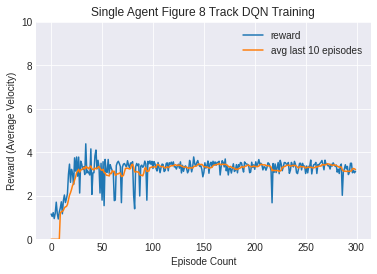

In [ ]:
import random
from ray.rllib.agents.pg.pg import PGTrainer
from ray.rllib.agents.ppo.ppo import PPOTrainer
from ray.rllib.agents.dqn.dqn import DQNTrainer
from ray import tune

#ray.init()

num_episodes = 0
cur_reward = 0
final_rewards = []
final_checkpoints =[]


register_env("multienv", lambda config: MultiCarEnv())


trainer = PPOTrainer(env="multienv", config={"timesteps_per_iteration": 1000, "vf_clip_param":3000, "gamma":.99,  "exploration_config": {
        # The Exploration class to use.
        "type": "EpsilonGreedy",
        # Config for the Exploration class' constructor:
        "initial_epsilon": 1.0,
        "final_epsilon": 0.05,
        "epsilon_timesteps": 80000,  # Timesteps over which to anneal epsilon.
    },})
i = 0
while i < 75:
    t_dict = trainer.train()
    print(t_dict)
    rewards = t_dict['hist_stats']['episode_reward']
    ep_lens = t_dict['hist_stats']['episode_lengths']
    ep_total = t_dict['episodes_this_iter']
    for j in range(ep_total):
      num_episodes += 1
    for j in range(ep_total):
      final_rewards.append(rewards[j] / 1000)

    i += 1

moving_average = []
curr_total = 0
for i in range(len(final_rewards)):
  if i < 9:
    moving_average.append(0)
    curr_total += final_rewards[i]
  else:
    curr_total += final_rewards[i]
    moving_average.append(curr_total/10)
    curr_total -= final_rewards[i-9]
  
  

print(len(final_rewards))
print(num_episodes)
fig = plt.figure()
ax = plt.subplot(111)
plt.style.use('seaborn-darkgrid')
ax.plot(final_rewards, label="reward")
ax.plot(moving_average, label="avg last 10 episodes")
ax.legend(loc='upper right')
plt.xlabel('Episode Count')
plt.ylabel('Reward (Average Velocity)')
plt.ylim(0, 10)
plt.title('Single Agent Figure 8 Track DQN Training')
plt.show()



#tune.run("PG", config={"env": "multienv", "train_batch_size": 1000})




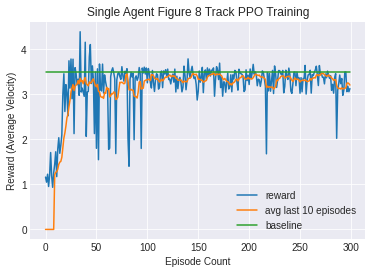

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)
plt.style.use('seaborn-darkgrid')
ax.plot(final_rewards, label="reward")
ax.plot(moving_average, label="avg last 10 episodes")
ax.plot(np.zeros(300) + 3.5, label="baseline")
ax.legend(loc='lower right')
plt.xlabel('Episode Count')
plt.ylabel('Reward (Average Velocity)')
plt.title('Single Agent Figure 8 Track PPO Training')
plt.show()

